# Powering Tetouan: Time Series Forecasting on Power Consumption in Quads, Smir and Boussafou zones.

In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import xgboost as xgb

In [359]:
df = pd.read_csv('sample_data.csv')

In [360]:
df.head()

Datetime  predicted_Zone1  predicted_Zone2  predicted_Zone3
0   2/12/2017 14:40            30000            10000            20000
1  11/22/2017 15:30            30000            10000            20000
2   10/15/2017 1:50            30000            10000            20000
3   9/11/2017 23:00            30000            10000            20000
4   12/26/2017 1:20            30000            10000            20000

In [361]:
train = pd.read_csv('train_data.csv')

In [362]:
train.head()

Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0   5/5/2017 22:30        17.84     55.42      4.920                0.099   
1   5/5/2017 21:30        18.71     49.68      4.919                0.048   
2  4/11/2017 16:40        15.76     85.70      0.068              200.700   
3  9/30/2017 21:40        19.19     83.60      4.919                0.073   
4   1/5/2017 10:40         8.82     65.24      0.084              322.500   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.089             39168.00000             24375.23220   
1         0.130             43272.39344             25723.83901   
2       182.800             32489.12809             18084.31772   
3         0.122             40218.05310             23864.03326   
4        40.380             31552.40506             20739.20973   

   PowerConsumption_Zone3  
0             23675.46559  
1             24730.68826  
2             17716.36364  
3             19198.03882  
4             15226.98795

In [363]:
from datetime import datetime

train['Datetime'] = train['Datetime'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M"))



In [364]:
train.head()

Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0 2017-05-05 22:30:00        17.84     55.42      4.920                0.099   
1 2017-05-05 21:30:00        18.71     49.68      4.919                0.048   
2 2017-04-11 16:40:00        15.76     85.70      0.068              200.700   
3 2017-09-30 21:40:00        19.19     83.60      4.919                0.073   
4 2017-01-05 10:40:00         8.82     65.24      0.084              322.500   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.089             39168.00000             24375.23220   
1         0.130             43272.39344             25723.83901   
2       182.800             32489.12809             18084.31772   
3         0.122             40218.05310             23864.03326   
4        40.380             31552.40506             20739.20973   

   PowerConsumption_Zone3  
0             23675.46559  
1             24730.68826  
2             17716.36364  
3             19198.03882  
4             15226.98795

In [365]:
train.tail()

Datetime  Temperature  Humidity  WindSpeed  \
41927 2017-02-27 02:40:00        14.89     56.81      0.081   
41928 2017-04-18 10:50:00        19.48     49.29      0.086   
41929 2017-08-18 17:30:00        27.57     54.98      0.067   
41930 2017-04-27 00:40:00        14.21     71.80      0.082   
41931 2017-02-22 05:30:00        13.48     67.66      0.083   

       GeneralDiffuseFlows  DiffuseFlows  PowerConsumption_Zone1  \
41927                0.051         0.111             22600.67797   
41928              732.000        59.810             34770.80732   
41929              317.800        76.000             37615.80466   
41930                0.026         0.167             26722.92788   
41931                0.059         0.178             25425.76271   

       PowerConsumption_Zone2  PowerConsumption_Zone3  
41927             13542.85714             14408.68342  
41928             20492.87169             17815.27273  
41929             25519.32418             26892.03762  
41930             15085.53971             17396.36364  
41931             12729.48328             14130.81407

In [366]:
train = train.set_index('Datetime')


In [367]:
train.head()

Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                                     
2017-05-05 22:30:00        17.84     55.42      4.920                0.099   
2017-05-05 21:30:00        18.71     49.68      4.919                0.048   
2017-04-11 16:40:00        15.76     85.70      0.068              200.700   
2017-09-30 21:40:00        19.19     83.60      4.919                0.073   
2017-01-05 10:40:00         8.82     65.24      0.084              322.500   

                     DiffuseFlows  PowerConsumption_Zone1  \
Datetime                                                    
2017-05-05 22:30:00         0.089             39168.00000   
2017-05-05 21:30:00         0.130             43272.39344   
2017-04-11 16:40:00       182.800             32489.12809   
2017-09-30 21:40:00         0.122             40218.05310   
2017-01-05 10:40:00        40.380             31552.40506   

                     PowerConsumption_Zone2  PowerConsumption_Zone3  
Datetime                                                             
2017-05-05 22:30:00             24375.23220             23675.46559  
2017-05-05 21:30:00             25723.83901             24730.68826  
2017-04-11 16:40:00             18084.31772             17716.36364  
2017-09-30 21:40:00             23864.03326             19198.03882  
2017-01-05 10:40:00             20739.20973             15226.98795

In [368]:
train = train.sort_index()

In [369]:
train.head()

Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                                     
2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
2017-01-01 00:50:00        5.853      76.9      0.081                0.059   

                     DiffuseFlows  PowerConsumption_Zone1  \
Datetime                                                    
2017-01-01 00:00:00         0.119             34055.69620   
2017-01-01 00:10:00         0.085             29814.68354   
2017-01-01 00:20:00         0.100             29128.10127   
2017-01-01 00:30:00         0.096             28228.86076   
2017-01-01 00:50:00         0.108             26624.81013   

                     PowerConsumption_Zone2  PowerConsumption_Zone3  
Datetime                                                             
2017-01-01 00:00:00             16128.87538             20240.96386  
2017-01-01 00:10:00             19375.07599             20131.08434  
2017-01-01 00:20:00             19006.68693             19668.43373  
2017-01-01 00:30:00             18361.09422             18899.27711  
2017-01-01 00:50:00             17416.41337             18130.12048

In [370]:
train.dtypes

Temperature               float64
Humidity                  float64
WindSpeed                 float64
GeneralDiffuseFlows       float64
DiffuseFlows              float64
PowerConsumption_Zone1    float64
PowerConsumption_Zone2    float64
PowerConsumption_Zone3    float64
dtype: object

In [371]:
train.describe()

Temperature      Humidity     WindSpeed  GeneralDiffuseFlows  \
count  41932.000000  41932.000000  41932.000000         41932.000000   
mean      18.794223     68.322970      1.958469           181.852878   
std        5.816396     15.550517      2.348605           263.567443   
min        3.247000     11.340000      0.050000             0.004000   
25%       14.380000     58.367500      0.078000             0.062000   
50%       18.770000     69.940000      0.086000             4.895500   
75%       22.860000     81.500000      4.915000           317.200000   
max       39.780000     94.800000      6.483000          1163.000000   

       DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
count  41932.000000            41932.000000            41932.000000   
mean      75.093093            32320.339175            21026.447763   
std      124.152443             7132.268087             5198.438443   
min        0.011000            13895.696200             8560.081466   
25%        0.122000            26275.404260            16964.133740   
50%        4.318000            32234.913770            20802.910600   
75%      101.300000            37274.569030            24683.207865   
max      933.000000            52204.395120            37408.860760   

       PowerConsumption_Zone3  
count            41932.000000  
mean             17818.976229  
std               6615.433440  
min               5935.174070  
25%              13104.578310  
50%              16409.233910  
75%              21580.023753  
max              47598.326360

In [372]:
train.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:10:00',
               '2017-01-01 00:20:00', '2017-01-01 00:30:00',
               '2017-01-01 00:50:00', '2017-01-01 01:00:00',
               '2017-01-01 01:10:00', '2017-01-01 01:40:00',
               '2017-01-01 01:50:00', '2017-01-01 02:00:00',
               ...
               '2017-12-30 22:10:00', '2017-12-30 22:20:00',
               '2017-12-30 22:30:00', '2017-12-30 22:40:00',
               '2017-12-30 22:50:00', '2017-12-30 23:00:00',
               '2017-12-30 23:10:00', '2017-12-30 23:20:00',
               '2017-12-30 23:40:00', '2017-12-30 23:50:00'],
              dtype='datetime64[ns]', name='Datetime', length=41932, freq=None)

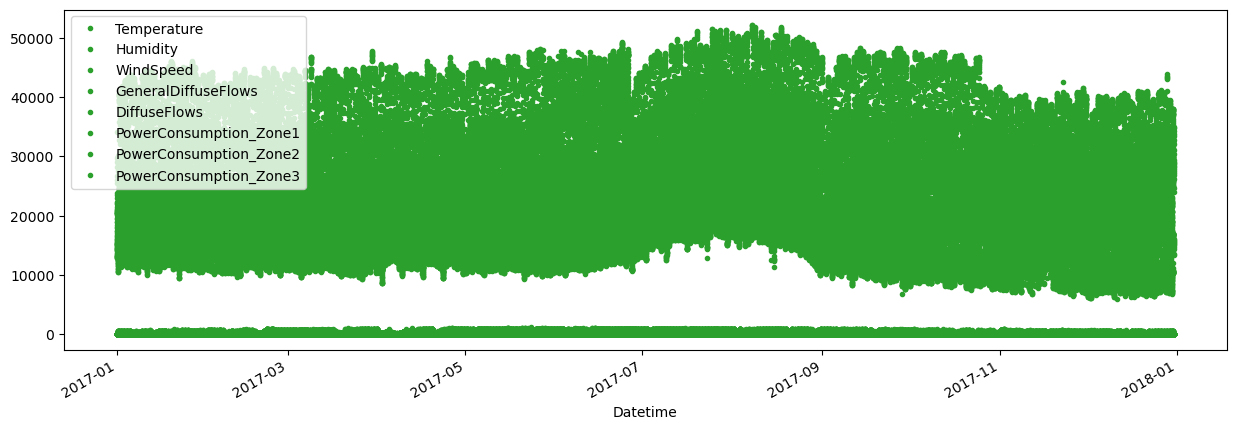

In [373]:
color_pal = sns.color_palette()
train.plot(style='.', figsize=(15, 5),
           color=color_pal[2],
           )
plt.show()

In [374]:
train.duplicated().sum()

0

In [375]:
train.isnull().sum()

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [376]:
train.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3'],
      dtype='object')

<AxesSubplot:xlabel='Datetime'>

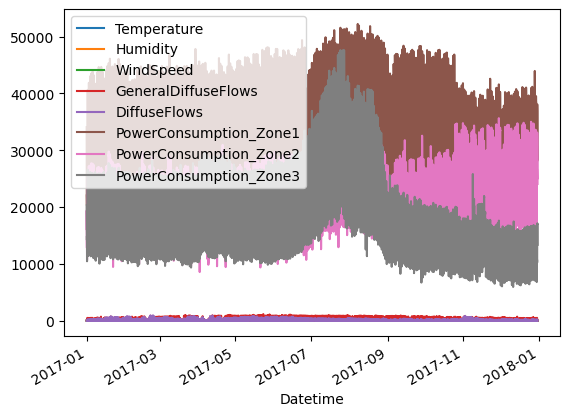

In [377]:
train.plot()

In [378]:
from statsmodels.tsa.stattools import adfuller

In [379]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [382]:
adf_test(train['PowerConsumption_Zone1'])

ADF Statistics: -31.241383612466837
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [383]:
adf_test(train['PowerConsumption_Zone2'])

ADF Statistics: -24.40380275781996
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [384]:
adf_test(train['PowerConsumption_Zone3'])

ADF Statistics: -14.225768828229596
p- value: 1.6283818887320797e-26
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Datetime'>

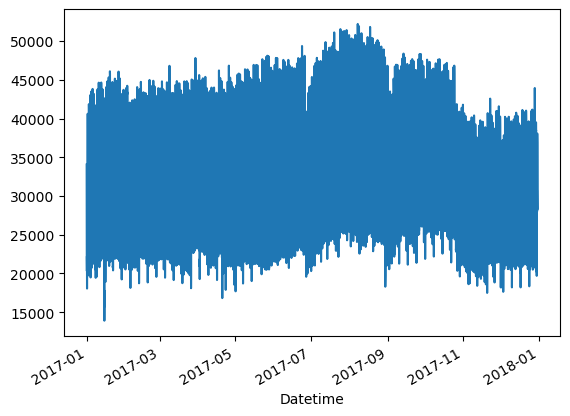

In [387]:
train['PowerConsumption_Zone1'].plot()

<AxesSubplot:xlabel='Datetime'>

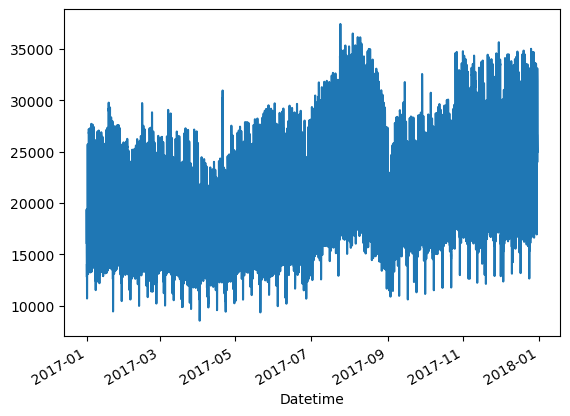

In [388]:
train['PowerConsumption_Zone2'].plot()

<AxesSubplot:xlabel='Datetime'>

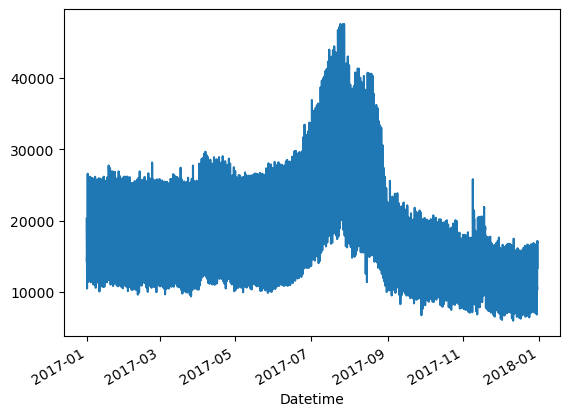

In [390]:
train['PowerConsumption_Zone3'].plot()

## Outliers Analysis and removal


<AxesSubplot:ylabel='Frequency'>

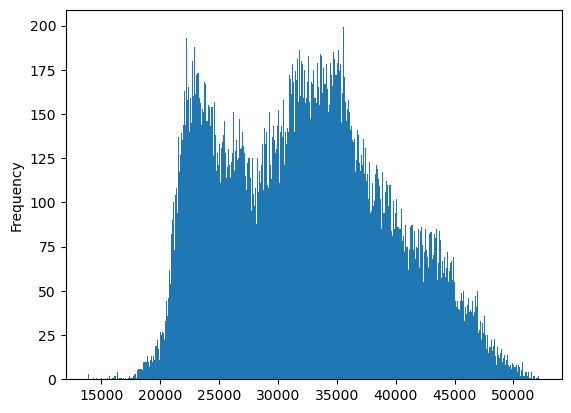

In [395]:
train['PowerConsumption_Zone1'].plot(kind='hist', bins=500)

<AxesSubplot:xlabel='Datetime'>

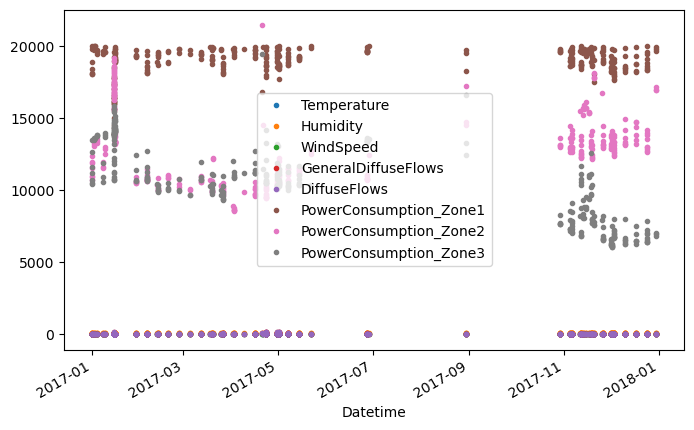

In [396]:
train.query('PowerConsumption_Zone1 < 20_000').plot(figsize=(8, 5), style = '.')

<AxesSubplot:xlabel='Datetime'>

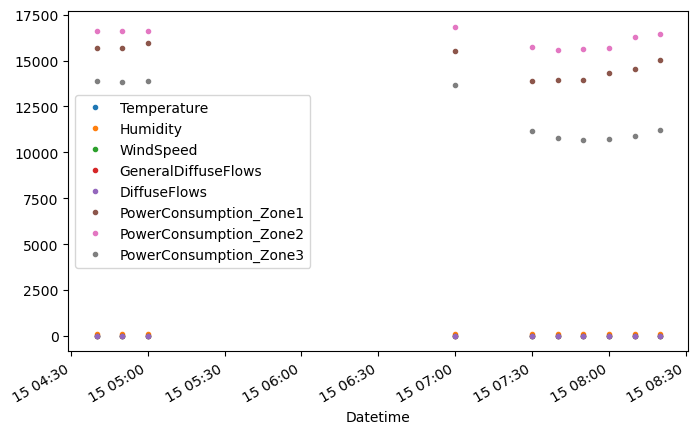

In [397]:
train.query('PowerConsumption_Zone1 < 16_000').plot(figsize=(8, 5), style = '.')



In [398]:
train = train.query('PowerConsumption_Zone1 > 19_000').copy()

<AxesSubplot:ylabel='Frequency'>

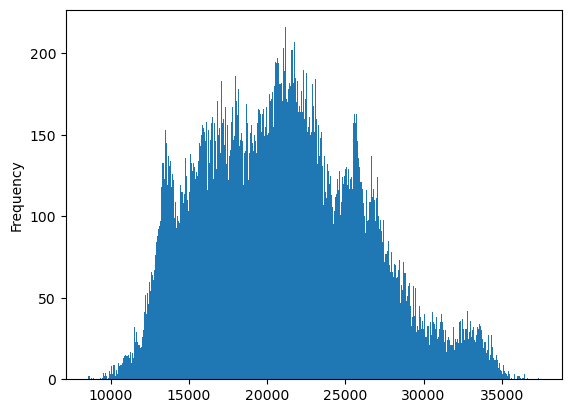

In [399]:
train['PowerConsumption_Zone2'].plot(kind='hist', bins=500)

<AxesSubplot:xlabel='Datetime'>

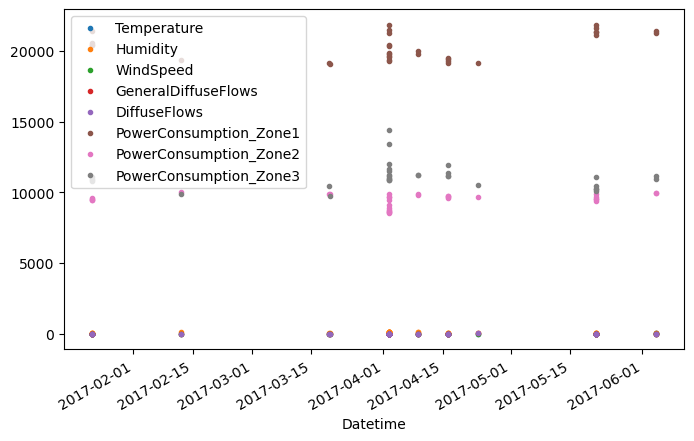

In [400]:
train.query('PowerConsumption_Zone2 < 10_000').plot(figsize=(8, 5), style = '.')

<AxesSubplot:xlabel='Datetime'>

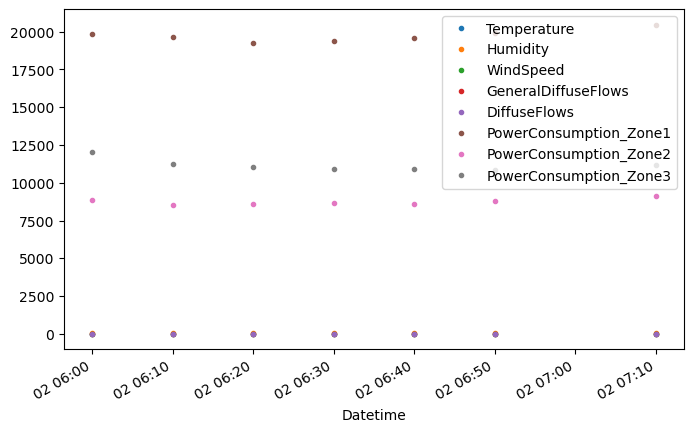

In [401]:
train.query('PowerConsumption_Zone2 < 9_300').plot(figsize=(8, 5), style = '.')

In [402]:
train = train.query('PowerConsumption_Zone2 > 9_300').copy()

<AxesSubplot:ylabel='Frequency'>

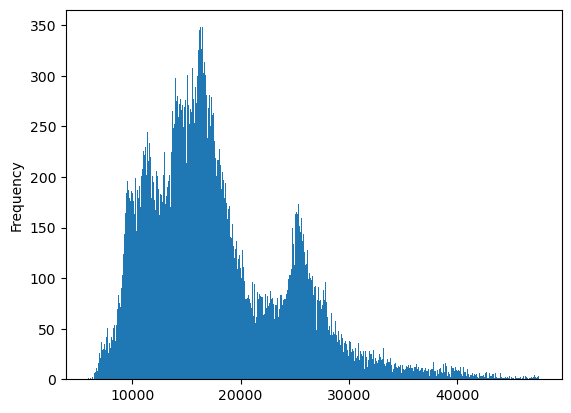

In [403]:
train['PowerConsumption_Zone3'].plot(kind='hist', bins=500)

<AxesSubplot:xlabel='Datetime'>

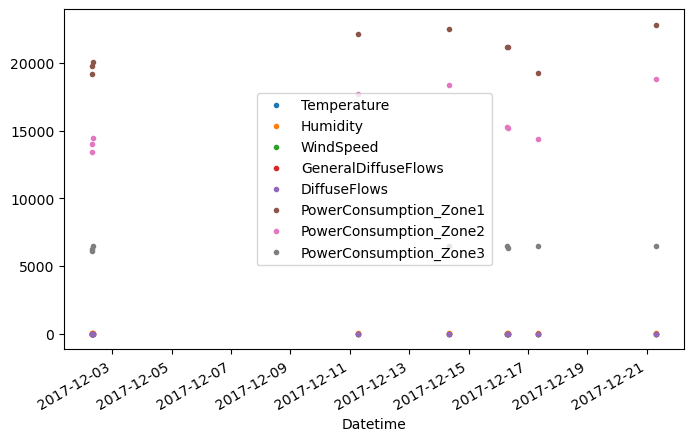

In [404]:
train.query('PowerConsumption_Zone3 < 6_500').plot(figsize=(8, 5), style = '.')


In [405]:
train = train.query('PowerConsumption_Zone3 > 6_500').copy()

In [499]:
train.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3', 'hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'lag1', 'lag2',
       'lag3'],
      dtype='object')

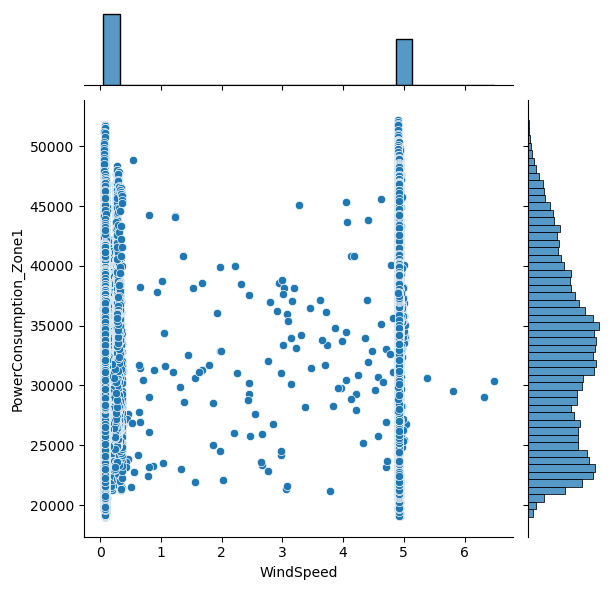

In [509]:
sns.jointplot(x='WindSpeed', y='PowerConsumption_Zone1', data=train)

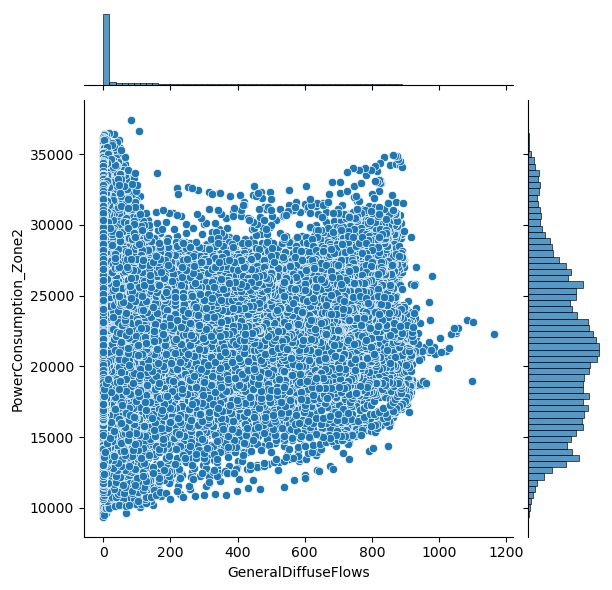

In [503]:
sns.jointplot(x='GeneralDiffuseFlows', y='PowerConsumption_Zone2', data=train)

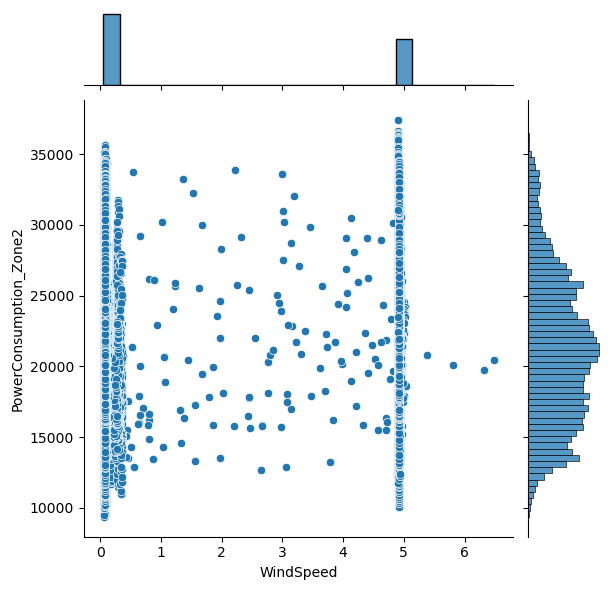

In [504]:
sns.jointplot(x='WindSpeed', y='PowerConsumption_Zone2', data=train)

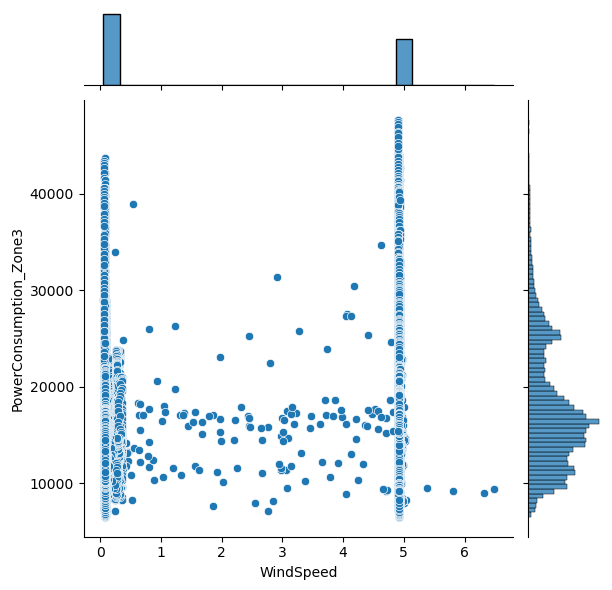

In [518]:
sns.jointplot(x='WindSpeed', y='PowerConsumption_Zone3', data=train)

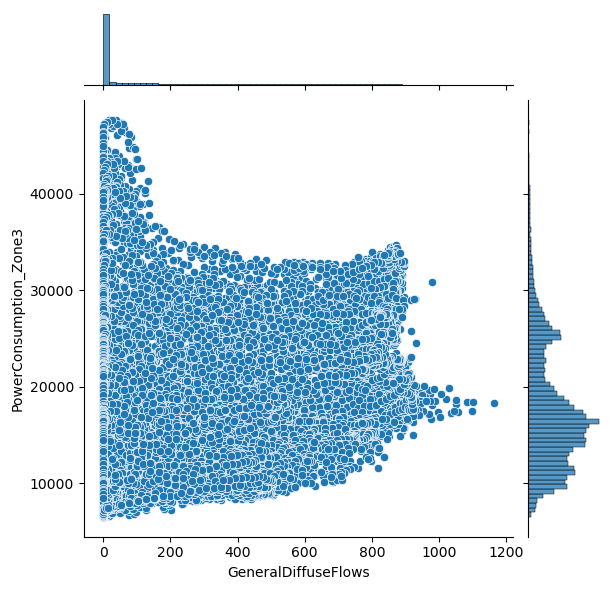

In [511]:
sns.jointplot(x='GeneralDiffuseFlows', y='PowerConsumption_Zone3', data=train)

In [515]:
uv = np.percentile(train.WindSpeed,[99])[0]

In [516]:
train[(train.WindSpeed>uv)]

Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                                     
2017-01-01 10:20:00        5.996     69.85      4.930               282.70   
2017-05-09 14:10:00       21.420     71.00      4.931               827.00   
2017-05-09 14:20:00       21.510     70.40      4.930               808.00   
2017-05-11 13:40:00       21.850     69.90      4.930               867.00   
2017-05-15 15:10:00       21.140     67.60      4.931               795.00   
...                          ...       ...        ...                  ...   
2017-11-19 08:30:00        9.770     85.70      4.934                62.93   
2017-11-19 08:40:00        9.940     85.40      4.933                94.40   
2017-11-19 09:00:00        9.930     84.40      4.932               107.30   
2017-11-22 11:40:00       14.280     58.53      4.933               455.50   
2017-12-03 19:10:00       14.000     65.99      4.955                 0.07   

                     DiffuseFlows  PowerConsumption_Zone1  \
Datetime                                                    
2017-01-01 10:20:00        31.960             26393.92405   
2017-05-09 14:10:00       132.600             35705.70492   
2017-05-09 14:20:00       122.100             35819.01639   
2017-05-11 13:40:00       218.500             36423.34426   
2017-05-15 15:10:00       435.900             34119.34426   
...                           ...                     ...   
2017-11-19 08:30:00        33.360             20972.30769   
2017-11-19 08:40:00        39.400             21323.07692   
2017-11-19 09:00:00        33.820             22633.84615   
2017-11-22 11:40:00        59.300             33163.07692   
2017-12-03 19:10:00         0.133             37742.96578   

                     PowerConsumption_Zone2  PowerConsumption_Zone3  hour  \
Datetime                                                                    
2017-01-01 10:20:00             16059.57447            14671.807230    10   
2017-05-09 14:10:00             23342.41486            15997.408910    14   
2017-05-09 14:20:00             23297.83282            16417.165990    14   
2017-05-11 13:40:00             23030.34056            17845.506070    13   
2017-05-15 15:10:00             23134.36533            17507.368420    15   
...                                     ...                     ...   ...   
2017-11-19 08:30:00             14016.94215             8454.939759     8   
2017-11-19 08:40:00             14485.53719             8611.084337     8   
2017-11-19 09:00:00             15162.39669             9039.036145     9   
2017-11-22 11:40:00             22890.49587            10236.144580    11   
2017-12-03 19:10:00             30535.74716            16048.019210    19   

                     dayofweek  quarter  month  year  dayofyear  dayofmonth  \
Datetime                                                                      
2017-01-01 10:20:00          6        1      1  2017          1           1   
2017-05-09 14:10:00          1        2      5  2017        129           9   
2017-05-09 14:20:00          1        2      5  2017        129           9   
2017-05-11 13:40:00          3        2      5  2017        131          11   
2017-05-15 15:10:00          0        2      5  2017        135          15   
...                        ...      ...    ...   ...        ...         ...   
2017-11-19 08:30:00          6        4     11  2017        323          19   
2017-11-19 08:40:00          6        4     11  2017        323          19   
2017-11-19 09:00:00          6        4     11  2017        323          19   
2017-11-22 11:40:00          2        4     11  2017        326          22   
2017-12-03 19:10:00          6        4     12  2017        337           3   

                     weekofyear         lag1         lag2          lag3  
Datetime                                                                 
2017-01-01 10:20:00          52   

In [517]:
train.WindSpeed[(train.WindSpeed> 3*uv)] = 3*uv

/var/folders/cp/zzchzjw14jb8x0ffxgyywy3m0000gp/T/ipykernel_5697/4188552802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.WindSpeed[(train.WindSpeed> 3*uv)] = 3*uv


<AxesSubplot:xlabel='PowerConsumption_Zone1', ylabel='count'>

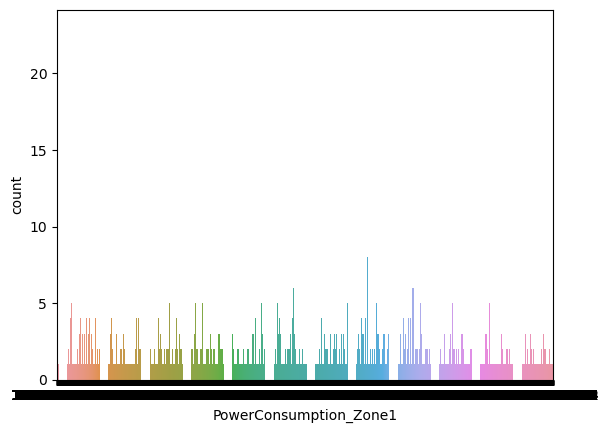

In [512]:
sns.countplot(x="PowerConsumption_Zone1", data=train)

## Feature Creation

In [406]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

train = create_features(train)

In [407]:
train.head()

Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                                     
2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
2017-01-01 00:50:00        5.853      76.9      0.081                0.059   

                     DiffuseFlows  PowerConsumption_Zone1  \
Datetime                                                    
2017-01-01 00:00:00         0.119             34055.69620   
2017-01-01 00:10:00         0.085             29814.68354   
2017-01-01 00:20:00         0.100             29128.10127   
2017-01-01 00:30:00         0.096             28228.86076   
2017-01-01 00:50:00         0.108             26624.81013   

                     PowerConsumption_Zone2  PowerConsumption_Zone3  hour  \
Datetime                                                                    
2017-01-01 00:00:00             16128.87538             20240.96386     0   
2017-01-01 00:10:00             19375.07599             20131.08434     0   
2017-01-01 00:20:00             19006.68693             19668.43373     0   
2017-01-01 00:30:00             18361.09422             18899.27711     0   
2017-01-01 00:50:00             17416.41337             18130.12048     0   

                     dayofweek  quarter  month  year  dayofyear  dayofmonth  \
Datetime                                                                      
2017-01-01 00:00:00          6        1      1  2017          1           1   
2017-01-01 00:10:00          6        1      1  2017          1           1   
2017-01-01 00:20:00          6        1      1  2017          1           1   
2017-01-01 00:30:00          6        1      1  2017          1           1   
2017-01-01 00:50:00          6        1      1  2017          1           1   

                     weekofyear  
Datetime                         
2017-01-01 00:00:00          52  
2017-01-01 00:10:00          52  
2017-01-01 00:20:00          52  
2017-01-01 00:30:00          52  
2017-01-01 00:50:00          52

In [408]:
def add_lags(df):
    target_map = df['PowerConsumption_Zone1'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('30 days')).map(target_map)
    return df

In [409]:
train = add_lags(train)


In [410]:
def add_lags1(df):
    target_map = df['PowerConsumption_Zone2'].to_dict()
    df['lag2'] = (df.index - pd.Timedelta('30 days')).map(target_map)
    return df

In [411]:
train = add_lags1(train)


In [412]:
def add_lags2(df):
    target_map = df['PowerConsumption_Zone3'].to_dict()
    df['lag3'] = (df.index - pd.Timedelta('30 days')).map(target_map)
    return df

In [413]:
train = add_lags2(train)


In [414]:
train

Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                                     
2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
2017-01-01 00:50:00        5.853      76.9      0.081                0.059   
...                          ...       ...        ...                  ...   
2017-12-30 23:00:00        7.070      72.5      0.080                0.059   
2017-12-30 23:10:00        7.010      72.4      0.080                0.040   
2017-12-30 23:20:00        6.947      72.6      0.082                0.051   
2017-12-30 23:40:00        6.758      73.0      0.080                0.066   
2017-12-30 23:50:00        6.580      74.1      0.081                0.062   

                     DiffuseFlows  PowerConsumption_Zone1  \
Datetime                                                    
2017-01-01 00:00:00         0.119             34055.69620   
2017-01-01 00:10:00         0.085             29814.68354   
2017-01-01 00:20:00         0.100             29128.10127   
2017-01-01 00:30:00         0.096             28228.86076   
2017-01-01 00:50:00         0.108             26624.81013   
...                           ...                     ...   
2017-12-30 23:00:00         0.093             32158.17490   
2017-12-30 23:10:00         0.096             31160.45627   
2017-12-30 23:20:00         0.093             30430.41825   
2017-12-30 23:40:00         0.089             28958.17490   
2017-12-30 23:50:00         0.111             28349.80989   

                     PowerConsumption_Zone2  PowerConsumption_Zone3  hour  \
Datetime                                                                    
2017-01-01 00:00:00             16128.87538             20240.96386     0   
2017-01-01 00:10:00             19375.07599             20131.08434     0   
2017-01-01 00:20:00             19006.68693             19668.43373     0   
2017-01-01 00:30:00             18361.09422             18899.27711     0   
2017-01-01 00:50:00             17416.41337             18130.12048     0   
...                                     ...                     ...   ...   
2017-12-30 23:00:00             27273.39675             14987.75510    23   
2017-12-30 23:10:00             26857.31820             14780.31212    23   
2017-12-30 23:20:00             26124.57809             14428.81152    23   
2017-12-30 23:40:00             24692.23688             13512.60504    23   
2017-12-30 23:50:00             24055.23167             13345.49820    23   

                     dayofweek  quarter  month  year  dayofyear  dayofmonth  \
Datetime                                                                      
2017-01-01 00:00:00          6        1      1  2017          1           1   
2017-01-01 00:10:00          6        1      1  2017          1           1   
2017-01-01 00:20:00          6        1      1  2017          1           1   
2017-01-01 00:30:00          6        1      1  2017          1           1   
2017-01-01 00:50:00          6        1      1  2017          1           1   
...                        ...      ...    ...   ...        ...         ...   
2017-12-30 23:00:00          5        4     12  2017        364          30   
2017-12-30 23:10:00          5        4     12  2017        364          30   
2017-12-30 23:20:00          5        4     12  2017        364          30   
2017-12-30 23:40:00          5        4     12  2017        364          30   
2017-12-30 23:50:00          5        4     12  2017        364          30   

                     weekofyear         lag1         lag2         lag3  
Datetime                                                                
2017-01-01 00:00:00          52     

## Removing Seasonnality

<AxesSubplot:xlabel='month'>

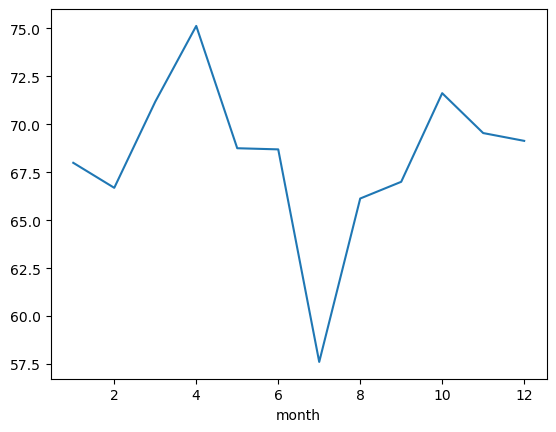

In [416]:
train.groupby('month')['Humidity'].mean().plot()

<AxesSubplot:xlabel='month'>

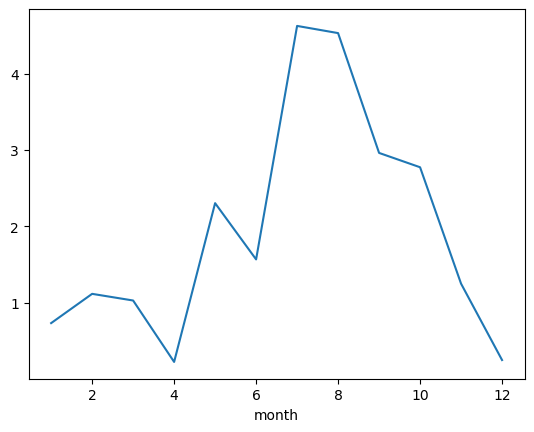

In [418]:
train.groupby('month')['WindSpeed'].mean().plot()


<AxesSubplot:xlabel='month'>

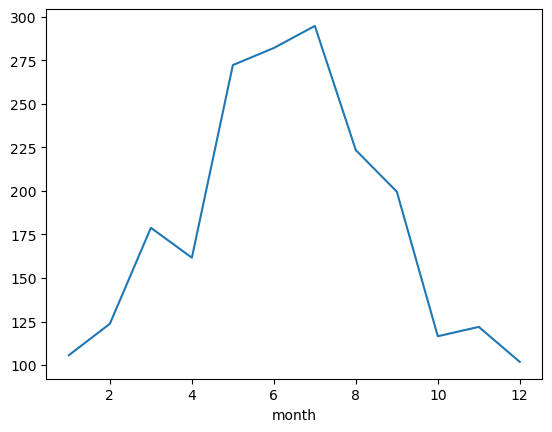

In [419]:
train.groupby('month')['GeneralDiffuseFlows'].mean().plot()


<AxesSubplot:xlabel='month'>

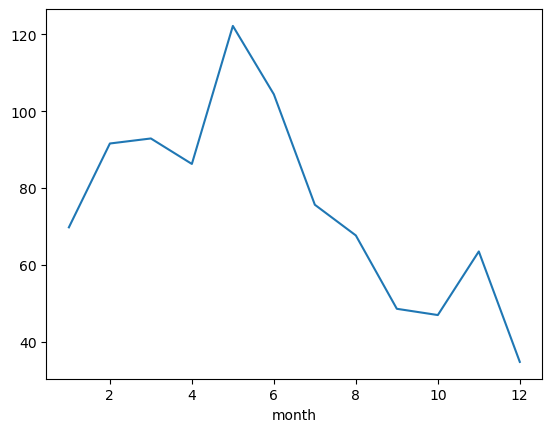

In [420]:
train.groupby('month')['DiffuseFlows'].mean().plot()

In [430]:
train.head()

Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                                     
2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
2017-01-01 00:50:00        5.853      76.9      0.081                0.059   

                     DiffuseFlows  PowerConsumption_Zone1  \
Datetime                                                    
2017-01-01 00:00:00         0.119             34055.69620   
2017-01-01 00:10:00         0.085             29814.68354   
2017-01-01 00:20:00         0.100             29128.10127   
2017-01-01 00:30:00         0.096             28228.86076   
2017-01-01 00:50:00         0.108             26624.81013   

                     PowerConsumption_Zone2  PowerConsumption_Zone3  hour  \
Datetime                                                                    
2017-01-01 00:00:00             16128.87538             20240.96386     0   
2017-01-01 00:10:00             19375.07599             20131.08434     0   
2017-01-01 00:20:00             19006.68693             19668.43373     0   
2017-01-01 00:30:00             18361.09422             18899.27711     0   
2017-01-01 00:50:00             17416.41337             18130.12048     0   

                     dayofweek  quarter  month  year  dayofyear  dayofmonth  \
Datetime                                                                      
2017-01-01 00:00:00          6        1      1  2017          1           1   
2017-01-01 00:10:00          6        1      1  2017          1           1   
2017-01-01 00:20:00          6        1      1  2017          1           1   
2017-01-01 00:30:00          6        1      1  2017          1           1   
2017-01-01 00:50:00          6        1      1  2017          1           1   

                     weekofyear  lag1  lag2  lag3  
Datetime                                           
2017-01-01 00:00:00          52   NaN   NaN   NaN  
2017-01-01 00:10:00          52   NaN   NaN   NaN  
2017-01-01 00:20:00          52   NaN   NaN   NaN  
2017-01-01 00:30:00          52   NaN   NaN   NaN  
2017-01-01 00:50:00          52   NaN   NaN   NaN

## Visualize our feature/target relationship

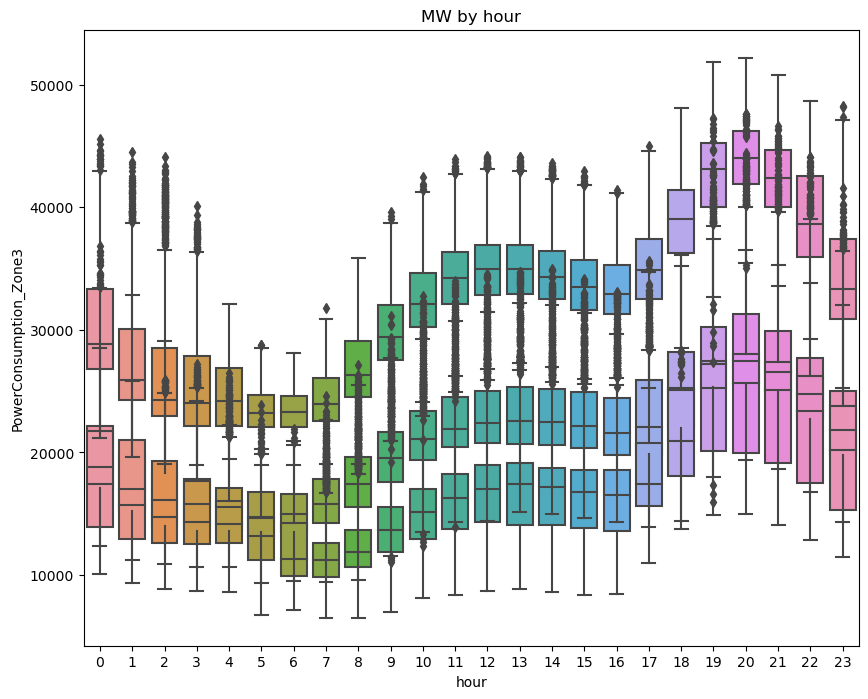

In [323]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=train, x='hour', y='PowerConsumption_Zone1')
sns.boxplot(data=train, x='hour', y='PowerConsumption_Zone2')
sns.boxplot(data=train, x='hour', y='PowerConsumption_Zone3')


ax.set_title('MW by hour')
plt.show()

<AxesSubplot:xlabel='PowerConsumption_Zone1', ylabel='count'>

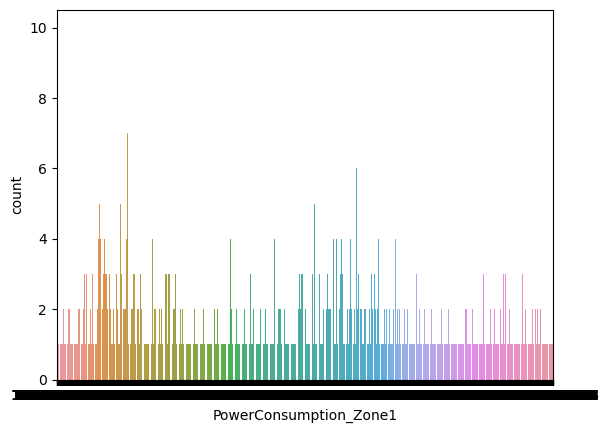

In [332]:
sns.countplot(x="PowerConsumption_Zone1", data= train)

<AxesSubplot:xlabel='PowerConsumption_Zone2', ylabel='count'>

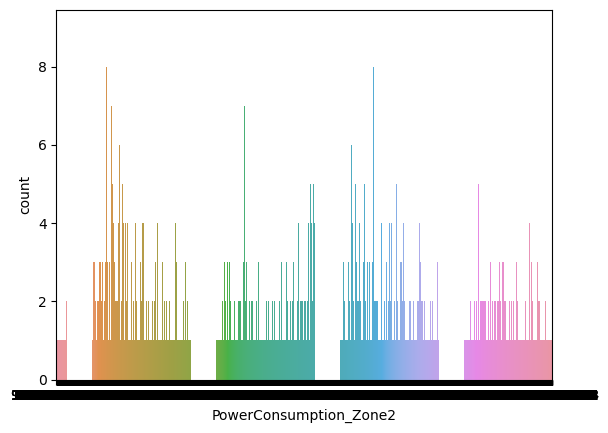

In [333]:
sns.countplot(x="PowerConsumption_Zone2", data= train)

<AxesSubplot:xlabel='PowerConsumption_Zone3', ylabel='count'>

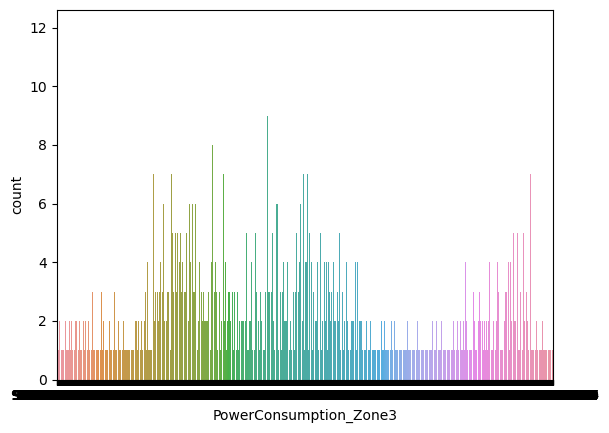

In [334]:
sns.countplot(x="PowerConsumption_Zone3", data= train)

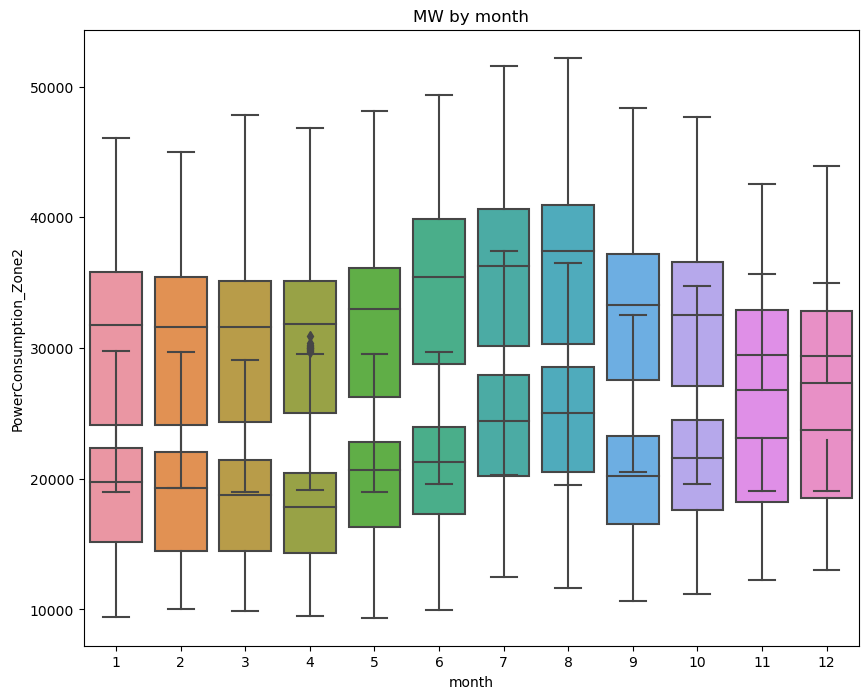

In [324]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=train, x='month', y='PowerConsumption_Zone1')
sns.boxplot(data=train, x='month', y='PowerConsumption_Zone2')



ax.set_title('MW by month')
plt.show()

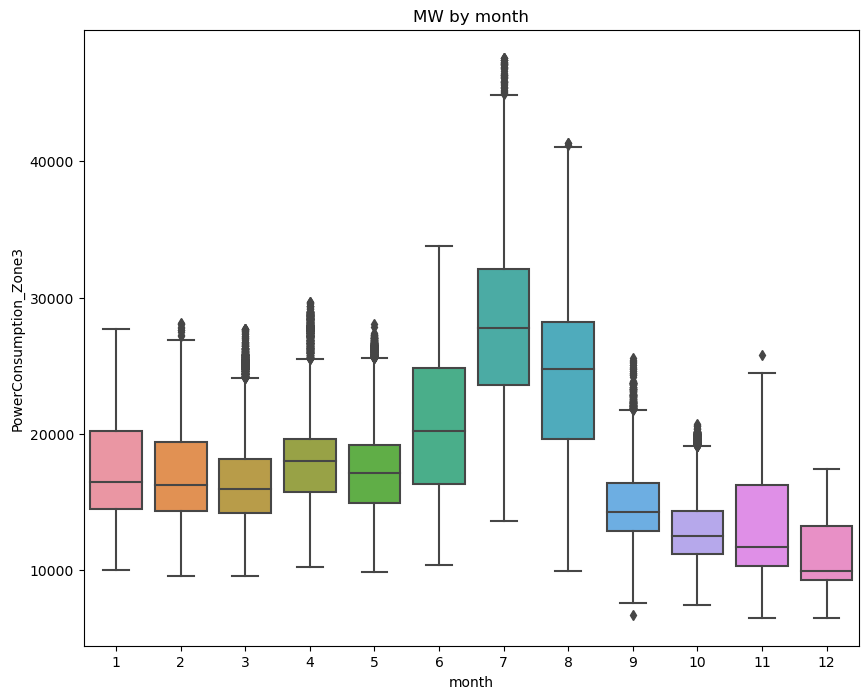

In [325]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=train, x='month', y='PowerConsumption_Zone3')



ax.set_title('MW by month')
plt.show()

In [326]:
test = pd.read_csv('test_data.csv')

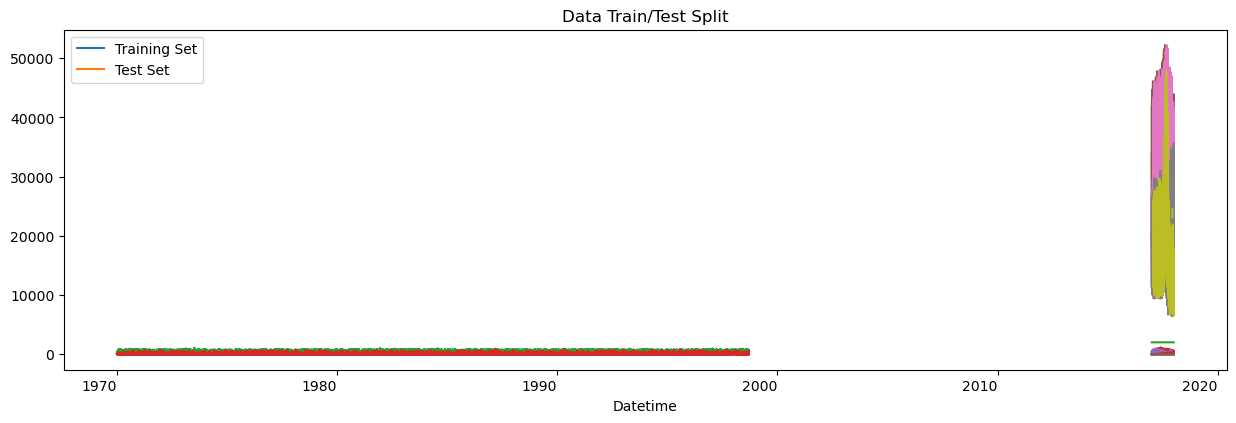

In [327]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training set',title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [328]:
train.head()

Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                                     
2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
2017-01-01 00:50:00        5.853      76.9      0.081                0.059   

                     DiffuseFlows  PowerConsumption_Zone1  \
Datetime                                                    
2017-01-01 00:00:00         0.119             34055.69620   
2017-01-01 00:10:00         0.085             29814.68354   
2017-01-01 00:20:00         0.100             29128.10127   
2017-01-01 00:30:00         0.096             28228.86076   
2017-01-01 00:50:00         0.108             26624.81013   

                     PowerConsumption_Zone2  PowerConsumption_Zone3  hour  \
Datetime                                                                    
2017-01-01 00:00:00             16128.87538             20240.96386     0   
2017-01-01 00:10:00             19375.07599             20131.08434     0   
2017-01-01 00:20:00             19006.68693             19668.43373     0   
2017-01-01 00:30:00             18361.09422             18899.27711     0   
2017-01-01 00:50:00             17416.41337             18130.12048     0   

                     dayofweek  quarter  month  year  dayofyear  dayofmonth  \
Datetime                                                                      
2017-01-01 00:00:00          6        1      1  2017          1           1   
2017-01-01 00:10:00          6        1      1  2017          1           1   
2017-01-01 00:20:00          6        1      1  2017          1           1   
2017-01-01 00:30:00          6        1      1  2017          1           1   
2017-01-01 00:50:00          6        1      1  2017          1           1   

                     weekofyear  lag1  lag2  lag3  
Datetime                                           
2017-01-01 00:00:00          52   NaN   NaN   NaN  
2017-01-01 00:10:00          52   NaN   NaN   NaN  
2017-01-01 00:20:00          52   NaN   NaN   NaN  
2017-01-01 00:30:00          52   NaN   NaN   NaN  
2017-01-01 00:50:00          52   NaN   NaN   NaN

In [341]:
train.dtypes

Temperature               float64
Humidity                  float64
WindSpeed                 float64
GeneralDiffuseFlows       float64
DiffuseFlows              float64
PowerConsumption_Zone1    float64
PowerConsumption_Zone2    float64
PowerConsumption_Zone3    float64
hour                        int64
dayofweek                   int64
quarter                     int64
month                       int64
year                        int64
dayofyear                   int64
dayofmonth                  int64
weekofyear                 UInt32
lag1                      float64
lag2                      float64
lag3                      float64
dtype: object

In [351]:
train.isnull().sum()

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
hour                      0
dayofweek                 0
quarter                   0
month                     0
year                      0
dayofyear                 0
dayofmonth                0
weekofyear                0
lag1                      0
lag2                      0
lag3                      0
dtype: int64

In [350]:
train = train.dropna()

## Test-Train Split

In [431]:
train.shape

(41773, 19)

In [432]:
train_size = int(train.shape[0]*0.8)
train_size

33418

In [433]:
train2 =  train[0:train_size]

In [434]:
test =  train[train_size:]

In [436]:
train2.shape

(33418, 19)

In [437]:
test.shape

(8355, 19)

In [440]:
X = train.drop(columns = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'])

In [441]:
X.head()

Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                                     
2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
2017-01-01 00:50:00        5.853      76.9      0.081                0.059   

                     DiffuseFlows  hour  dayofweek  quarter  month  year  \
Datetime                                                                   
2017-01-01 00:00:00         0.119     0          6        1      1  2017   
2017-01-01 00:10:00         0.085     0          6        1      1  2017   
2017-01-01 00:20:00         0.100     0          6        1      1  2017   
2017-01-01 00:30:00         0.096     0          6        1      1  2017   
2017-01-01 00:50:00         0.108     0          6        1      1  2017   

                     dayofyear  dayofmonth  weekofyear  lag1  lag2  lag3  
Datetime                                                                  
2017-01-01 00:00:00          1           1          52   NaN   NaN   NaN  
2017-01-01 00:10:00          1           1          52   NaN   NaN   NaN  
2017-01-01 00:20:00          1           1          52   NaN   NaN   NaN  
2017-01-01 00:30:00          1           1          52   NaN   NaN   NaN  
2017-01-01 00:50:00          1           1          52   NaN   NaN   NaN

In [477]:
y = train[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]


In [478]:
y.head()

PowerConsumption_Zone1  PowerConsumption_Zone2  \
Datetime                                                              
2017-01-01 00:00:00             34055.69620             16128.87538   
2017-01-01 00:10:00             29814.68354             19375.07599   
2017-01-01 00:20:00             29128.10127             19006.68693   
2017-01-01 00:30:00             28228.86076             18361.09422   
2017-01-01 00:50:00             26624.81013             17416.41337   

                     PowerConsumption_Zone3  
Datetime                                     
2017-01-01 00:00:00             20240.96386  
2017-01-01 00:10:00             20131.08434  
2017-01-01 00:20:00             19668.43373  
2017-01-01 00:30:00             18899.27711  
2017-01-01 00:50:00             18130.12048

In [479]:
train_size = int(len(train) * 0.7) 
val_size = int(len(train) * 0.2)
test_size = len(train) - train_size - val_size


In [480]:
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]


In [481]:
predictions = X_test.copy()

In [482]:
print(predictions)
print(y_test)

                     Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                                     
2017-11-24 06:40:00        9.010     63.36      4.914                0.080   
2017-11-24 06:50:00        9.130     62.03      4.914                0.095   
2017-11-24 07:00:00        9.280     60.66      4.922                0.080   
2017-11-24 07:10:00        9.180     59.89      4.917                0.051   
2017-11-24 07:30:00        9.120     59.73      4.916                0.080   
...                          ...       ...        ...                  ...   
2017-12-30 23:00:00        7.070     72.50      0.080                0.059   
2017-12-30 23:10:00        7.010     72.40      0.080                0.040   
2017-12-30 23:20:00        6.947     72.60      0.082                0.051   
2017-12-30 23:40:00        6.758     73.00      0.080                0.066   
2017-12-30 23:50:00        6.580     74.10      0.081           

In [483]:
X['lag1'].fillna(X['lag1'].mean(), inplace=True)
X['lag2'].fillna(X['lag2'].mean(), inplace=True)
X['lag3'].fillna(X['lag3'].mean(), inplace=True)

In [520]:
from sklearn.linear_model import LinearRegression

In [521]:
lm2 = LinearRegression()

In [522]:
lm2.fit(X,y)

LinearRegression()

In [523]:
print(lm2.intercept_, lm2.coef_)

[ -2273.16182962   3032.46495844 -41073.2590982 ] [[ 2.77524599e+02  4.22523132e+00  2.12029272e+01  1.42585062e-01
  -2.93791202e+00  4.80512529e+02 -2.62700086e+02 -3.43595867e+01
   1.16414878e+04 -7.48059392e-11 -3.85686031e+02  3.98109883e+02
  -1.98209863e+01  3.03662244e-01  4.85058935e-02  1.39667235e-01]
 [ 7.41265722e+01 -2.44718172e+01  2.59758594e+01  1.65376077e-01
  -1.38764008e+00  3.29522483e+02 -3.88042715e+02  1.27959297e+03
   3.84665323e+03 -2.70006240e-11 -1.29985367e+02  1.45114990e+02
   1.31728960e+01  7.90820898e-02  2.79710446e-01  7.43458563e-03]
 [ 4.51685075e+02 -6.55353599e+00  1.49182329e+02 -3.56700025e+00
  -5.90390767e+00  2.41621903e+02  4.02065520e+01  3.01132536e+03
   4.11776890e+04 -2.59660737e-10 -1.40823614e+03  1.38773448e+03
   4.73828597e+00  8.59428287e-03  7.92077133e-02  3.41905670e-01]]


In [526]:
lm2.predict(X)

array([[22384.28634253, 13755.83743407, 14315.95175877],
       [22347.10553567, 13728.00913098, 14246.00290761],
       [22318.96673299, 13720.42228199, 14199.87514547],
       ...,
       [32121.6035282 , 25948.46471701,  9539.51652146],
       [31520.13743164, 25492.69006487,  9143.19648015],
       [31218.65729614, 25258.9854389 ,  8935.29952222]])

test_size = 0.2

# determine the index of the split between training and testing sets
split_idx = int(len(train) * (1 - test_size))

# split the data into training and testing sets
x_train, y_train = train[:split_idx], y_train[:split_idx]
x_test, y_test = x_train[split_idx:], y_train[split_idx:]

##  Time Series Cross Validation


In [352]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=10*12*1, gap=24)
train = train.sort_index()

In [353]:
train.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3', 'hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'lag1', 'lag2',
       'lag3'],
      dtype='object')

fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = train.iloc[train_idx]
    test = test.iloc[val_idx]
    train['PowerConsumption_Zone1'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['PowerConsumption_Zone1'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [354]:
import pandas as pd

train_size = int(len(train) * 0.8)  # 80% for training
train_data = train.iloc[:train_size]
test_data = train.iloc[train_size:]

# Split the training and testing sets into input features (X) and output variables (y)
X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]

# Print the shapes of X_train, y_train, X_test, and y_test
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4129, 18)
y_train shape: (4129,)
X_test shape: (1033, 18)
y_test shape: (1033,)


In [355]:
import xgboost as xgb 
model = xgb.XGBClassifier()

In [356]:
model.fit(X_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [   0    1    2 ... 2366 2367 2368], got [ 9592.281407  9870.150754  9910.673367 ... 27602.89157  27626.0241
 27724.33735 ]

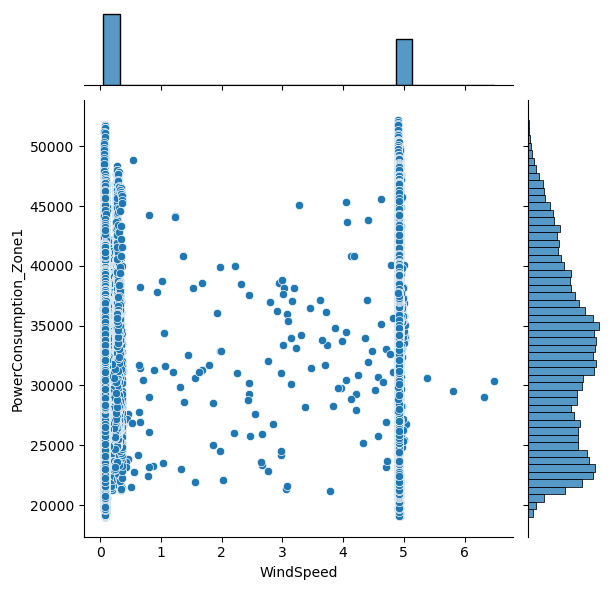

In [497]:
sns.jointplot(x='WindSpeed', y='PowerConsumption_Zone1', data=train)

In [494]:
train.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3', 'hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'lag1', 'lag2',
       'lag3'],
      dtype='object')

## Feature Importance


In [421]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

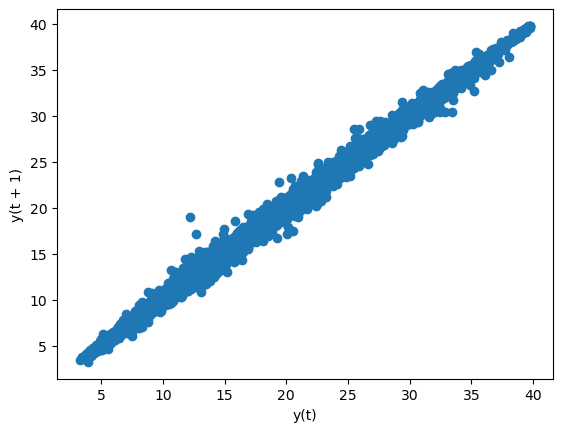

In [422]:
lag_plot(train['Temperature'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

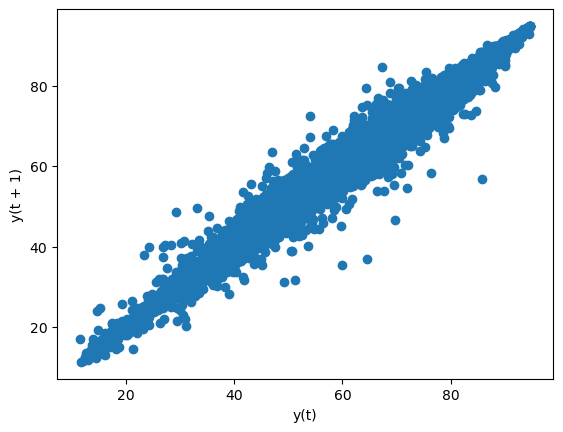

In [423]:
lag_plot(train['Humidity'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

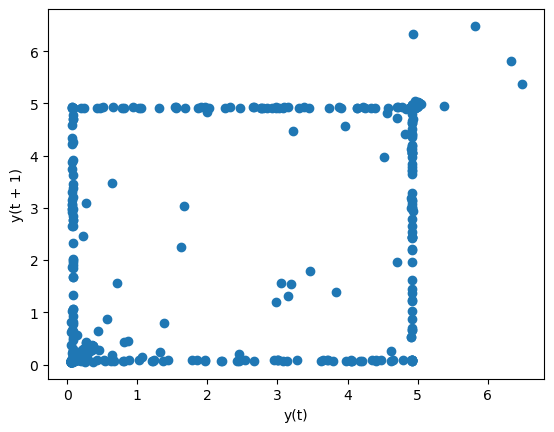

In [424]:
lag_plot(train['WindSpeed'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

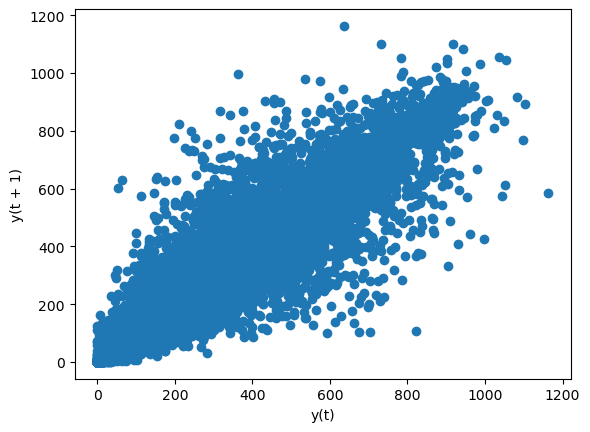

In [425]:
lag_plot(train['GeneralDiffuseFlows'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

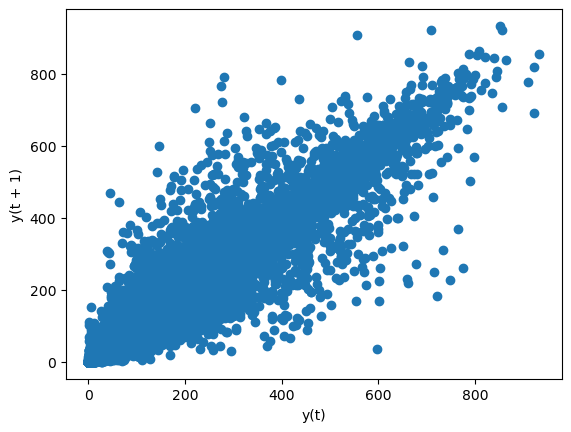

In [426]:
lag_plot(train['DiffuseFlows'])

In [ ]:
train = train.loc[train.index < '09-09-2017']
test = train.loc[train.index >= '09-09-2017']

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
train.plot(ax=ax, label='Training set',title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('09-09-2017', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [ ]:
train.loc[(train.index > '01-01-2017') & (train.index < '01-08-2017')].plot(figsize=(15,5), title='Weekly data')
plt.show()

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df.sort_index()

In [ ]:
train.columns

In [ ]:
test.tail()

In [ ]:
train = create_features(train)
test = create_features(test)

In [ ]:
train.columns

In [ ]:
features=['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows','hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'lag1', 'lag2',
       'lag3']
target = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3']

In [ ]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,
                      learning_rate = 0.01)
reg.fit(X_train, y_train , 
       eval_set =[(X_train, y_train), (X_test, y_test)],
        verbose=100
       )